- Task
    
    classifiess movie reviews as positive or negative using the text of the review.
    
- Implementation
    
    keras
    
- datasets
    
    IMDB 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/home/jasonhaven/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


In [5]:
# download the data
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

'''
The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. 

The rare words are discarded to keep the size of the data manageable.

'''

'\nThe argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. \n\nThe rare words are discarded to keep the size of the data manageable.\n\n'

In [7]:
# Explore the data 
'''
understand the format of the data. 
The dataset comes preprocessed: 
    each example is an array of integers representing the words of the movie review. Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.
'''
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Testing entries: {}, labels: {}".format(len(test_data), len(test_labels)))

Training entries: 25000, labels: 25000
Testing entries: 25000, labels: 25000


In [10]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
print(train_labels[0])

1


In [12]:
class_name=['negative','postive']

In [14]:
'''
Movie reviews may be different lengths. 
The below code shows the number of words in the first and second reviews. 
Since inputs to a neural network must be the same length, we'll need to resolve this later.
'''
len(train_data[0]), len(train_data[1])

(218, 189)

In [26]:
# Convert the integers back to words
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [27]:
len(word_index)

88588

In [28]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [34]:
# Prepare the data

'''
The reviews—the arrays of integers—must be converted to tensors before fed into the neural network. This conversion can be done a couple of ways:

1.One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix.

2.Alternatively, we can pad the arrays so they all have the same length, then create an integer tensor of shape num_examples * max_length. We can use an embedding layer capable of handling this shape as the first layer in our network.
'''

# In this tutorial, we will use the second approach.
# Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths:

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [36]:
max([len(x) for x in train_data+test_data])

256

In [38]:
help(keras.preprocessing.sequence.pad_sequences)

Help on function pad_sequences in module tensorflow.python.keras.preprocessing.sequence:

pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)
    Pads sequences to the same length.
    
    This function transforms a list of
    `num_samples` sequences (lists of integers)
    into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
    `num_timesteps` is either the `maxlen` argument if provided,
    or the length of the longest sequence otherwise.
    
    Sequences that are shorter than `num_timesteps`
    are padded with `value` at the end.
    
    Sequences longer than `num_timesteps` are truncated
    so that they fit the desired length.
    The position where padding or truncation happens is determined by
    the arguments `padding` and `truncating`, respectively.
    
    Pre-padding is the default.
    
    Arguments:
        sequences: List of lists, where each element is a sequence.
        maxlen: Int, maximum length of all 

In [39]:
word_index["<PAD>"]

0

In [40]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [41]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [43]:
# Build the model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


1. The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).


2. Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model can handle input of variable length, in the simplest way possible.


3. This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.


4. The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.


In [44]:
# Hidden units
'''
The above model has two intermediate or "hidden" layers, between the input and output. The number of outputs (units, nodes, or neurons) is the dimension of the representational space for the layer. In other words, the amount of freedom the network is allowed when learning an internal representation.

If a model has more hidden units (a higher-dimensional representation space), and/or more layers, then the network can learn more complex representations. However, it makes the network more computationally expensive and may lead to learning unwanted patterns—patterns that improve performance on training data but not on the test data. This is called overfitting, and we'll explore it later.
'''
# Loss function and optimizer
'''
A model needs a loss function and an optimizer for training.

Since this is a binary classification problem and the model outputs of a probability (a single-unit layer with a sigmoid activation), 
we'll use the binary_crossentropy loss function.

'''
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [45]:
# Create a validation set

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [46]:
# Train the model

'''
Train the model for 20 epochs in mini-batches of 512 samples. 

This is 20 iterations over all samples in the x_train and y_train tensors. 

While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:
'''

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 74us/step - loss: 0.6979 - acc: 0.5093 - val_loss: 0.6937 - val_acc: 0.5028
Epoch 2/40
15000/15000 [==============================] - 1s 54us/step - loss: 0.6919 - acc: 0.5184 - val_loss: 0.6908 - val_acc: 0.5202
Epoch 3/40
15000/15000 [==============================] - 1s 48us/step - loss: 0.6894 - acc: 0.5372 - val_loss: 0.6890 - val_acc: 0.5686
Epoch 4/40
15000/15000 [==============================] - 1s 47us/step - loss: 0.6871 - acc: 0.5937 - val_loss: 0.6867 - val_acc: 0.6014
Epoch 5/40
15000/15000 [==============================] - 1s 51us/step - loss: 0.6841 - acc: 0.6140 - val_loss: 0.6834 - val_acc: 0.6180
Epoch 6/40
15000/15000 [==============================] - 1s 48us/step - loss: 0.6804 - acc: 0.6538 - val_loss: 0.6796 - val_acc: 0.6491
Epoch 7/40
15000/15000 [==============================] - 1s 47us/step - loss: 0.6752 - acc: 0.6964 - val_loss: 0.6745 - val_acc

In [47]:
# Evaluate the model

results=model.evaluate(test_data,test_labels)

print(results)

25000/25000 [==============================] - 0s 14us/step
[0.30557309093475343, 0.87432]


In [48]:
# Create a graph of accuracy and loss over time

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

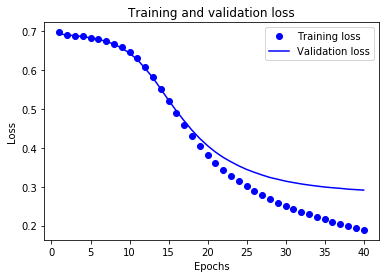

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
print(len(acc),len(val_acc),len(loss),len(val_loss))

40 40 40 40


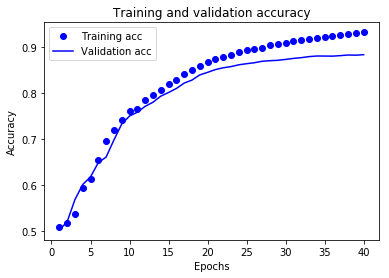

In [54]:
#plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()